****

# <Center> Midterm Project - Owen Ragsdale

****

### Overview

The objective of this project is to analyze Major League Baseball hitting statisitcs for the last 10 years (2012-2022). The jupyter notebook will include a few visulizations along with several commands to help describe the data. This notebook also includes principal component analysis, k-means clustering, and hierarchical clustering. 

****

### Data Dictionary

The data has the following attributes:

- Player: The name of the player
- Team: The name of the team
- Pos: The postion of the player
- Age: The age of the player
- G: Number of games played
- AB: Number of at bats
- R: Number of runs the player scored
- H: Number of hits
- 2B: Number of doubles
- 3B: Number of triples
- HR: Number of Homeruns
- RBI: Runs batted in
- SB: Stolen bases
- CS: Caught stealing
- BB: Based on ball (walks)
- SO: Strike-outs
- SH: Sacrifice hits
- SF: Sacrifice flys
- HBP: Hit by pitch
- AVG: Batting average
- OBP: On base percentage
- SLG: Slugging percentage
- OPS: On base plus slugging
- Year: The year
- PlayerID: Unique player ID


****

## Loading packages

****

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
hitting_data = pd.read_csv("mlb-player-stats-Batters.csv")

In [4]:
#Importing PCA and TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [5]:
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#importing clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

#Silhouette score
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [6]:
pip install scikit-learn-extra

Note: you may need to restart the kernel to use updated packages.


In [7]:
from sklearn_extra.cluster import KMedoids

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage

****

### Starting point

Starting with the head command, it is useful to pull of the first five observations and take a look at format and features that make-up the data set.

In [9]:
hitting_data.head(5)

,Player,Team,Pos,Age,G,AB,R,H,2B,3B,...,SO,SH,SF,HBP,AVG,OBP,SLG,OPS,Year,PlayerID
0,Cesar Hernandez,WAS,2B,32,43,177,23,49,10,1,...,40,1,0,2,0.277,0.326,0.345,0.671,2022,1
1,Bo Bichette,TOR,SS,24,42,174,19,41,8,0,...,45,0,0,0,0.236,0.273,0.385,0.658,2022,2
2,Cedric Mullins,BAL,OF,27,43,174,22,43,8,1,...,37,1,1,5,0.247,0.309,0.391,0.700,2022,3
3,Ty France,SEA,2B,27,43,173,18,57,9,0,...,21,0,1,6,0.329,0.394,0.486,0.880,2022,4
4,Pete Alonso,NYM,1B,27,44,170,26,49,7,0,...,40,0,2,5,0.288,0.356,0.524,0.880,2022,5


### Importance of a primary key

Something that will eventually get dropped but is incredibly important for the preliminary analysis is the primary key feature. This feature prevents players with the same name from being mistaken for one another.  

In [10]:
hitting_data.loc[hitting_data['Player']=='Cesar Hernandez',]

,Player,Team,Pos,Age,G,AB,R,H,2B,3B,...,SO,SH,SF,HBP,AVG,OBP,SLG,OPS,Year,PlayerID
0,Cesar Hernandez,WAS,2B,32,43,177,23,49,10,1,...,40,1,0,2,0.277,0.326,0.345,0.671,2022,1
674,Cesar Hernandez,CLE,2B,32,96,376,60,87,17,2,...,90,0,2,4,0.231,0.307,0.431,0.738,2021,1
855,Cesar Hernandez,CWS,2B,32,53,194,24,45,4,0,...,45,0,1,1,0.232,0.309,0.299,0.608,2021,1
1252,Cesar Hernandez,CLE,2B,32,58,233,35,66,20,0,...,57,1,0,2,0.283,0.355,0.408,0.763,2020,1
1872,Cesar Hernandez,PHI,2B,32,161,612,77,171,31,3,...,100,0,4,6,0.279,0.333,0.408,0.741,2019,1
2566,Cesar Hernandez,PHI,2B,32,161,605,91,153,15,3,...,155,1,3,4,0.253,0.356,0.362,0.718,2018,1
3331,Cesar Hernandez,PHI,2B,32,128,511,85,150,26,6,...,104,0,1,4,0.294,0.373,0.421,0.794,2017,1
3998,Cesar Hernandez,PHI,2B,32,155,547,67,161,14,11,...,116,5,2,2,0.294,0.371,0.393,0.764,2016,1
4757,Cesar Hernandez,PHI,2B,32,127,405,57,110,20,4,...,86,4,1,2,0.272,0.339,0.348,0.687,2015,1
5703,Cesar Hernandez,PHI,2B,32,66,114,13,27,2,0,...,33,1,1,0,0.237,0.290,0.281,0.571,2014,1


In [11]:
hitting_data.info

<bound method DataFrame.info of                   Player Team Pos  Age   G   AB   R   H  2B  3B  ...  SO  SH  \
0        Cesar Hernandez  WAS  2B   32  43  177  23  49  10   1  ...  40   1   
1            Bo Bichette  TOR  SS   24  42  174  19  41   8   0  ...  45   0   
2         Cedric Mullins  BAL  OF   27  43  174  22  43   8   1  ...  37   1   
3              Ty France  SEA  2B   27  43  173  18  57   9   0  ...  21   0   
4            Pete Alonso  NYM  1B   27  44  170  26  49   7   0  ...  40   0   
...                  ...  ...  ..  ...  ..  ...  ..  ..  ..  ..  ...  ..  ..   
7350      Adam Greenberg  MIA  OF   41   1    1   0   0   0   0  ...   1   0   
7351     Ryan Langerhans  LAA  OF   42   2    1   0   0   0   0  ...   1   1   
7352  Francisco Cervelli  NYY   C   36   3    1   1   0   0   0  ...   0   0   
7353          Josh Satin  NYM  1B   37   1    1   0   0   0   0  ...   1   0   
7354           L.J. Hoes  BAL  OF   32   2    1   0   0   0   0  ...   0   0   

      S

In [12]:
hitting_data[hitting_data.duplicated()]

,Player,Team,Pos,Age,G,AB,R,H,2B,3B,...,SO,SH,SF,HBP,AVG,OBP,SLG,OPS,Year,PlayerID


***

# No duplicates


****

In [13]:
hitting_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,7355.0,33.140449,5.006467,21.0,29.000,33.000,36.000,55.0
G,7355.0,65.493678,50.049326,1.0,21.000,52.000,109.000,162.0
AB,7355.0,209.649898,186.867031,0.0,49.000,148.000,346.000,684.0
R,7355.0,27.737458,27.876173,0.0,5.000,18.000,44.000,137.0
H,7355.0,53.418219,51.879790,0.0,10.000,35.000,87.000,225.0
2B,7355.0,10.607614,10.866670,0.0,2.000,7.000,17.000,56.0
3B,7355.0,1.056832,1.738799,0.0,0.000,0.000,1.000,15.0
HR,7355.0,7.064446,8.877735,0.0,1.000,3.000,10.000,59.0
RBI,7355.0,26.453433,27.678083,0.0,4.000,16.000,41.000,139.0
SB,7355.0,3.332835,6.312323,0.0,0.000,1.000,4.000,64.0


## Observation

Taking a look at the description of the data above allows us to spot features of interest. 

- There appear to be several features that are right skewed (H, HR, RBI, SO, AB)
- Year, PlayerID, and age to a certain degree don't matter in this context but could be used in further analysis

Based on intuition and previous knowledge of the dataset, these descriptions of the data is to be expected because the data set includes all players who hit. Meaning the dataset includes pitchers and bench players who are naturally skew the data. 

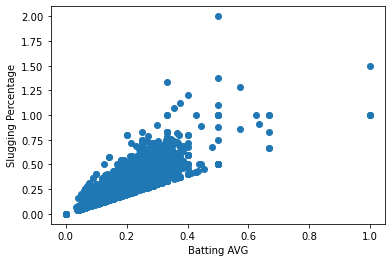

In [14]:
# data
X = hitting_data['AVG']
Y = hitting_data['SLG']

# plot the scatter plot
plt.scatter(X,Y)

# add the axes labels to the plot
plt.xlabel('Batting AVG')
plt.ylabel('Slugging Percentage')

# display the plot
plt.show()

### Observation

Since slugging percentage is equal to TB(total bases)/AB = Slg and batting average is equal to H/AB = Avg we'd expect to see, at least visually, a strong relationship. However, in theory an indiviual could hit lots of singles and have a high average by a low slugging percentage; therfore, we will need to dive deeper or comapre other statistics such as OBS.

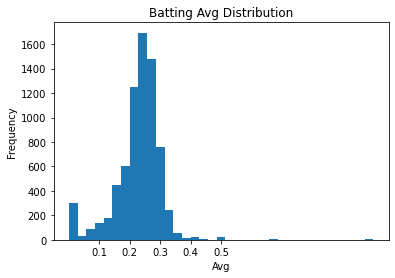

In [15]:
# plot the histogram
# specify the number of bins, using 'bins' parameter
plt.hist(hitting_data['AVG'], bins= 35)

# add the graph title and axes labels
plt.title('Batting Avg Distribution')
plt.xlabel('Avg')
plt.ylabel('Frequency')

plt.xticks([.100, .200, .300, .400, .500])

# display the plot
plt.show()

### Batting average

At this point I thought it would be useful to take a look at the distribution of batting averages. As mentioned above, this is the distribution we would expect due to the amount of players that are considered bench players and pitchers. The value of he plot is more in seeing the outliers and interval in which the majority of data points reside. 

In [16]:
V2_hitting = hitting_data.drop(columns=["Player", "CS", "SH", "SF", "HBP", "Team", "Pos"])

## Refining the data set

Now that we have taken a look at the data, we have decided to refine the features that are included for further analysis. Variables such as caught stealing (cs) and hit by pitch (HBP) are not variables of interest.

Dropping the player feature only occurs because we care far less about indivudual analysis and more about a macro view. 

G
Skew : 0.47


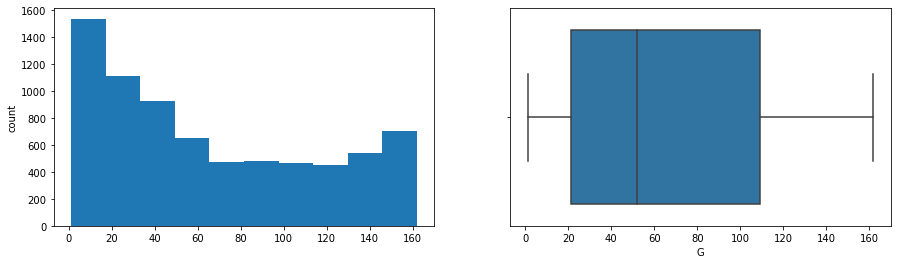

AB
Skew : 0.76


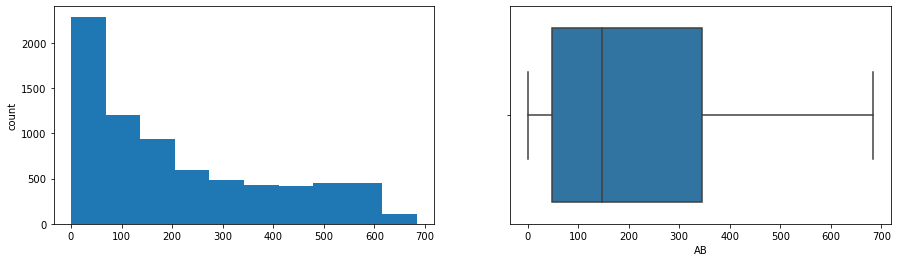

R
Skew : 1.12


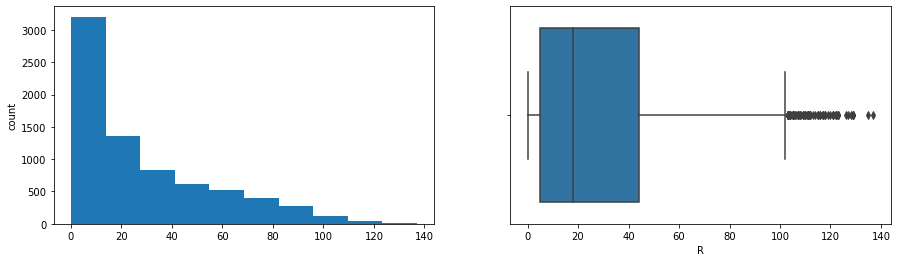

H
Skew : 0.94


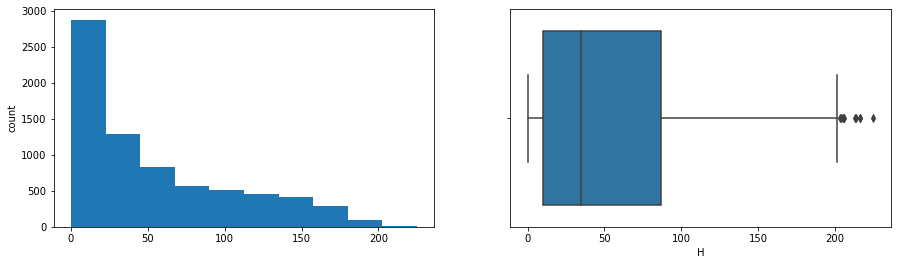

2B
Skew : 1.11


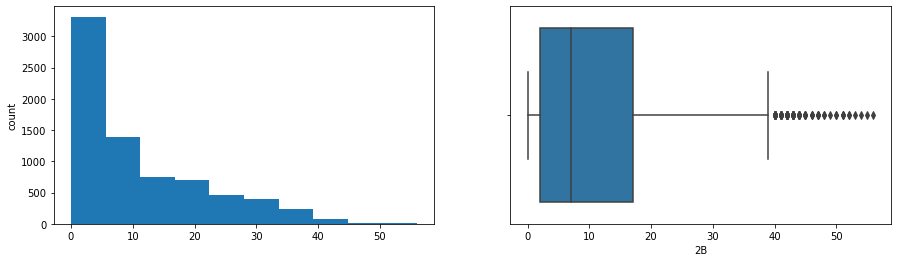

3B
Skew : 2.51


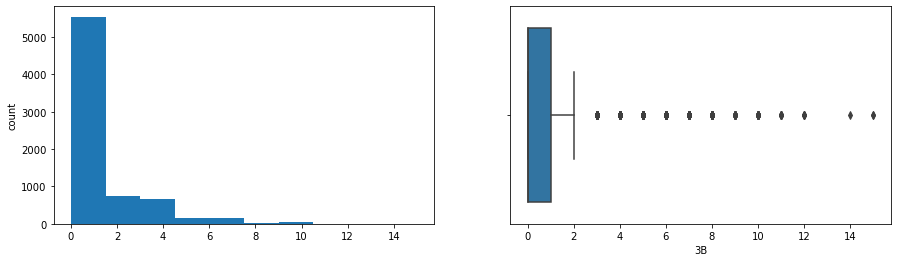

HR
Skew : 1.73


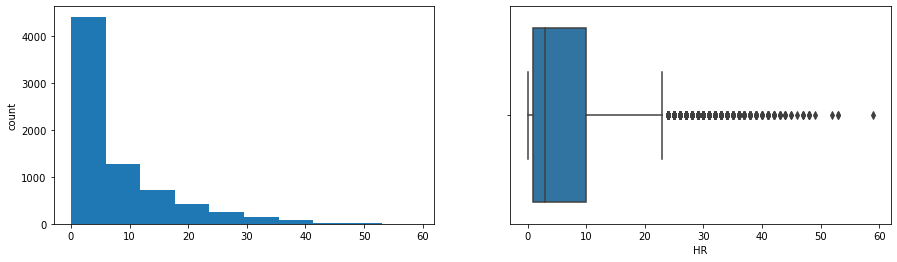

RBI
Skew : 1.21


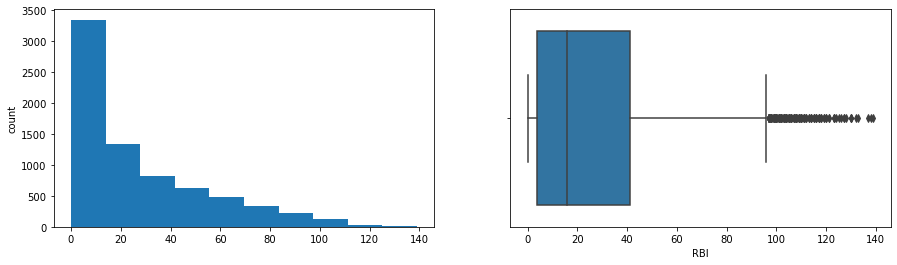

SB
Skew : 3.57


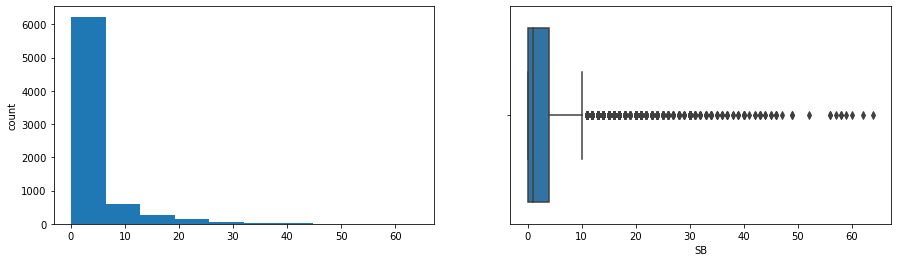

BB
Skew : 1.55


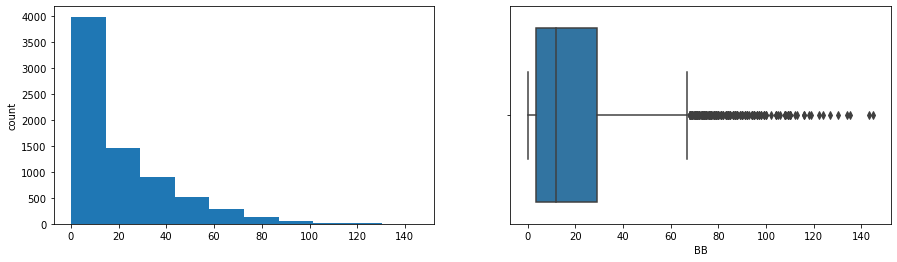

SO
Skew : 0.99


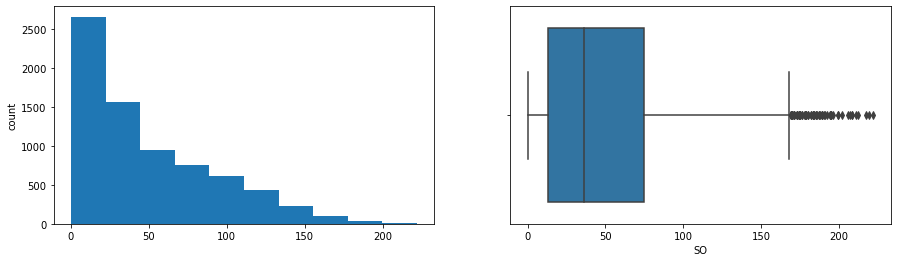

AVG
Skew : -0.22


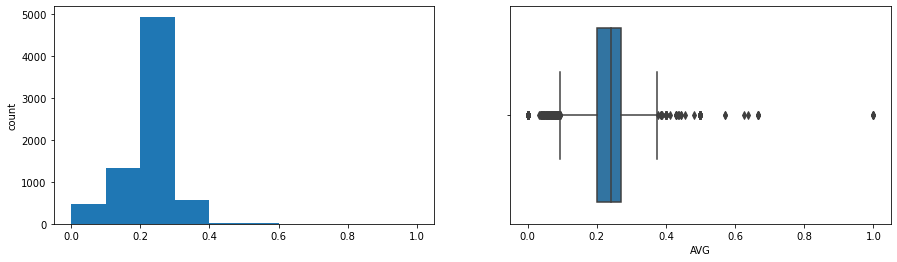

OBP
Skew : -0.43


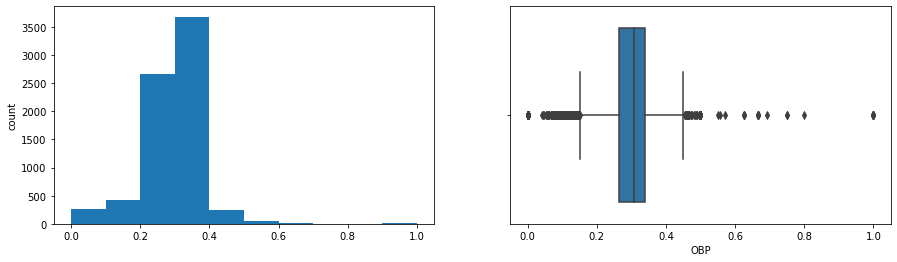

SLG
Skew : 0.1


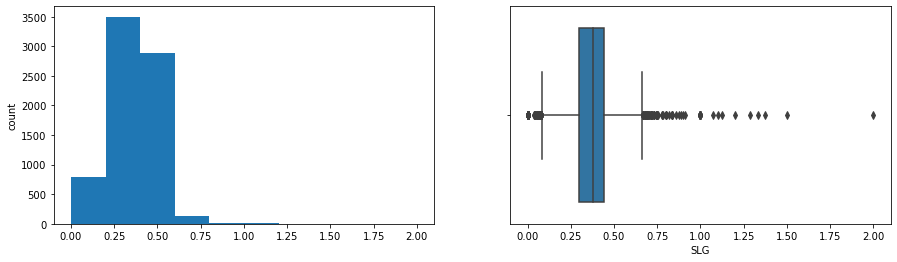

OPS
Skew : -0.41


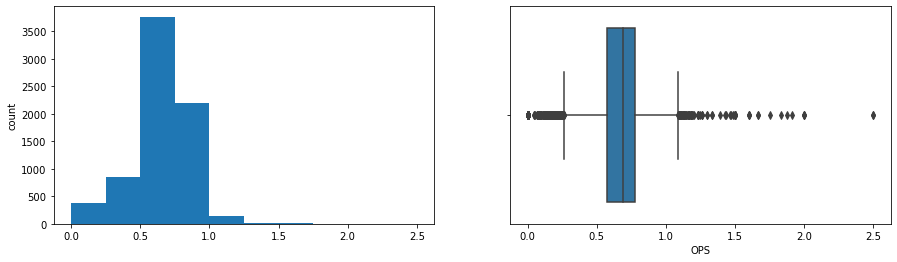

Year
Skew : 0.03


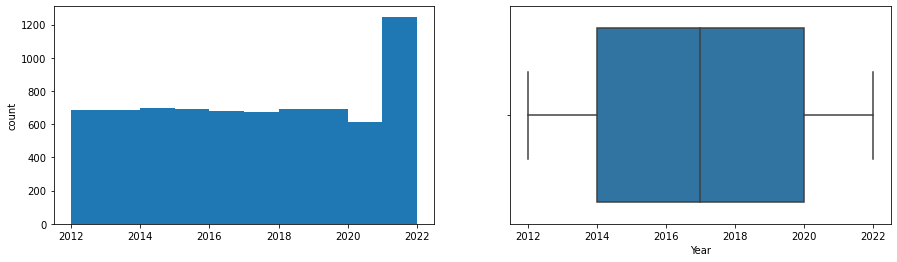

PlayerID
Skew : 0.23


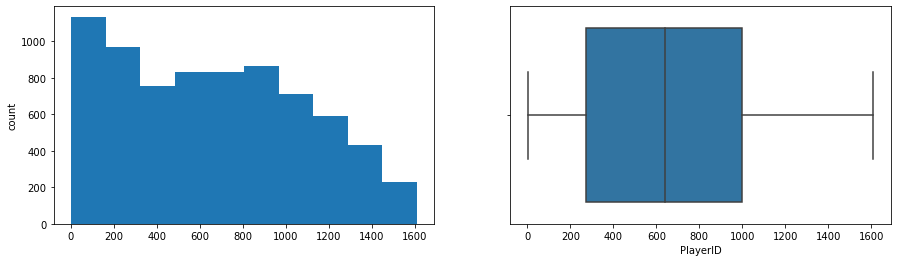

In [17]:
for col in V2_hitting.columns[1:]:
    print(col)
    print('Skew :',round(V2_hitting[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    V2_hitting[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=V2_hitting[col])
    plt.show()

In [18]:
V2_hitting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7355 entries, 0 to 7354
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       7355 non-null   int64  
 1   G         7355 non-null   int64  
 2   AB        7355 non-null   int64  
 3   R         7355 non-null   int64  
 4   H         7355 non-null   int64  
 5   2B        7355 non-null   int64  
 6   3B        7355 non-null   int64  
 7   HR        7355 non-null   int64  
 8   RBI       7355 non-null   int64  
 9   SB        7355 non-null   int64  
 10  BB        7355 non-null   int64  
 11  SO        7355 non-null   int64  
 12  AVG       7355 non-null   float64
 13  OBP       7355 non-null   float64
 14  SLG       7355 non-null   float64
 15  OPS       7355 non-null   float64
 16  Year      7355 non-null   int64  
 17  PlayerID  7355 non-null   int64  
dtypes: float64(4), int64(14)
memory usage: 1.0 MB


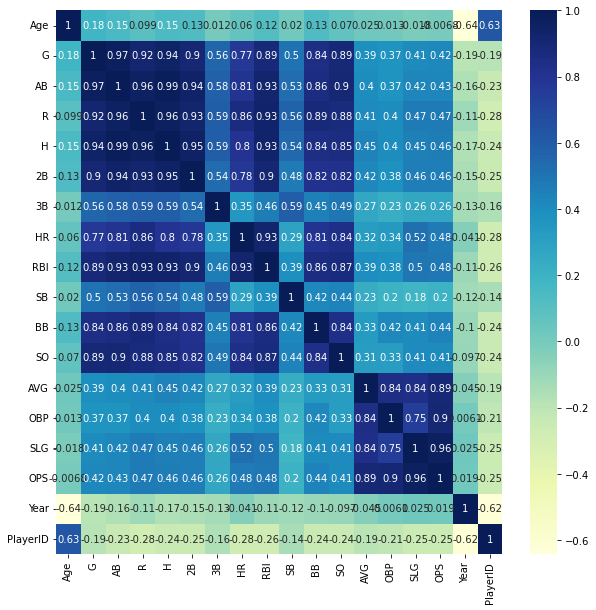

In [19]:
plt.figure(figsize  = (10,10))
sns.heatmap(V2_hitting.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Heat map

- Several patterns most of which we would expect 
- Notes: SO and hits have a much higher relationship than I would've thought
- Also I expected HR to be more correlated with slugging

In [20]:
scaler=StandardScaler()
hitting_scaled=pd.DataFrame(scaler.fit_transform(V2_hitting), columns=V2_hitting.columns)

hitting_scaled.head()

,Age,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,AVG,OBP,SLG,OPS,Year,PlayerID
0,-0.227811,-0.449461,-0.174735,-0.169958,-0.085168,-0.055919,-0.032687,-0.795803,-0.630630,-0.211162,-0.409716,-0.204628,0.642776,0.372816,-0.128348,0.065203,1.645985,-1.540813
1,-1.825852,-0.469442,-0.190790,-0.313460,-0.239382,-0.239981,-0.607836,-0.119909,-0.197044,0.105700,-0.505263,-0.088851,0.112155,-0.242881,0.154346,0.004361,1.645985,-1.538473
2,-1.226587,-0.449461,-0.190790,-0.205833,-0.200828,-0.239981,-0.032687,-0.232558,-0.377705,0.897855,-0.409716,-0.274095,0.254516,0.175328,0.196750,0.200928,1.645985,-1.536133
3,-1.226587,-0.449461,-0.196142,-0.349335,0.069045,-0.147950,-0.607836,-0.119909,0.055881,-0.528025,-0.314169,-0.644584,1.315760,1.162767,0.868149,1.043358,1.645985,-1.533794
4,-1.226587,-0.429479,-0.212197,-0.062332,-0.085168,-0.332011,-0.607836,0.443336,0.489466,-0.369593,-0.266395,-0.204628,0.785138,0.721324,1.136708,1.043358,1.645985,-1.531454


# Principal Component Analysis

In [21]:
#Defining the number of principal components to generate 
n=hitting_scaled.shape[1]

#Finding principal components for the data
pca = PCA(n_components=n, random_state=1)
data_pca1 = pd.DataFrame(pca.fit_transform(hitting_scaled))

#The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

Text(0, 0.5, 'Cumulative Explained Variance')

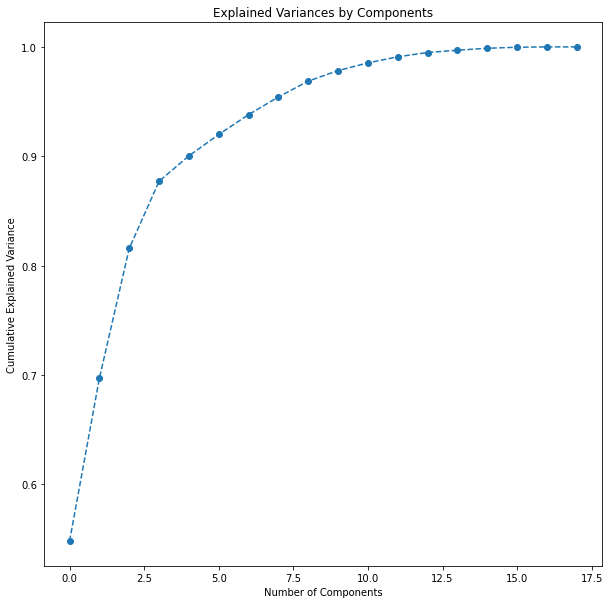

In [22]:
# visualize the Explained Individual Components
plt.figure(figsize = (10,10))
plt.plot(range(0,18), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [23]:
# find the least number of components that can explain more than 85% variance
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.850):
    print("Number of PCs that explain at least 85% variance: ", ix+1)
    break

Number of PCs that explain at least 85% variance:  4


### Observations

As we can see from the output above we can see that from the orignial 18 features (variables) we can reduce our number of features to 4, these 4 features explain roughly 85% of the original variance.

*****

In [24]:
pc_comps = ['PC1','PC2','PC3']
data_pca = pd.DataFrame(np.round(pca.components_[:3,:],2),index=pc_comps,columns=hitting_scaled.columns)
data_pca.T

,PC1,PC2,PC3
Age,0.03,-0.29,0.50
G,0.30,-0.14,-0.02
AB,0.30,-0.14,-0.05
R,0.31,-0.10,-0.07
H,0.31,-0.11,-0.04
2B,0.30,-0.10,-0.04
3B,0.19,-0.09,-0.05
HR,0.27,-0.05,-0.08
RBI,0.30,-0.08,-0.06
SB,0.17,-0.10,-0.06


In [25]:
np.prod(data_pca.T[1:])

PC1    2.483123e-12
PC2    1.832789e-14
PC3    7.214156e-18
dtype: float64

In [26]:
def color_high(val):
    if val <-0.25: # you can decide any value as per your understanding
        return 'background: pink'
    elif val >0.25:
        return 'background: skyblue'   
    
data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3
Age,0.030000,-0.290000,0.500000
G,0.300000,-0.140000,-0.020000
AB,0.300000,-0.140000,-0.050000
R,0.310000,-0.100000,-0.070000
H,0.310000,-0.110000,-0.040000
2B,0.300000,-0.100000,-0.040000
3B,0.190000,-0.090000,-0.050000
HR,0.270000,-0.050000,-0.080000
RBI,0.300000,-0.080000,-0.060000
SB,0.170000,-0.100000,-0.060000


## Observation 

PC2 is interesting because it may be showing the value of younger players in recent years. Whereas, PC3 seems to be showing the value and impact of older players. 

Text(0, 0.5, 'PC2')

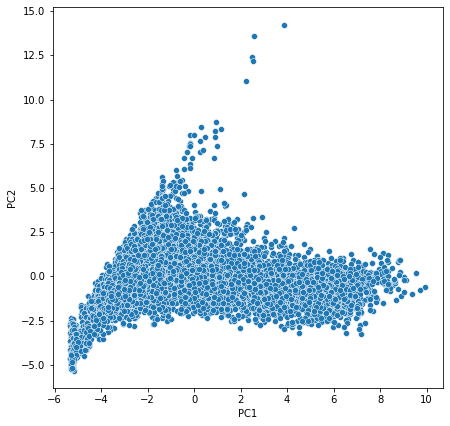

In [27]:
plt.figure(figsize = (7,7))
sns.scatterplot(x=data_pca1[0],y=data_pca1[1])
plt.xlabel("PC1")
plt.ylabel("PC2")

# t-SNE

In [28]:
#Fitting TSNE with number of components equal to 2 
tsne = TSNE(n_components = 2, random_state=1)
data_tsne = tsne.fit_transform(hitting_scaled)

In [29]:
#Converting the embeddings to a dataframe
data_tsne=pd.DataFrame(data_tsne, columns=['X1', 'X2'])

<AxesSubplot:xlabel='X1', ylabel='X2'>

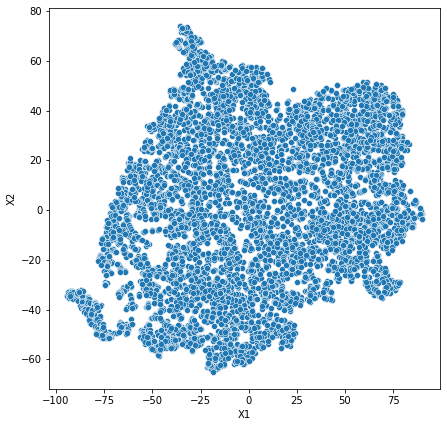

In [30]:
#Scatter plot for two components
plt.figure(figsize = (7,7))
sns.scatterplot(x = 'X1', y='X2', data = data_tsne)

# K-Means Clustering

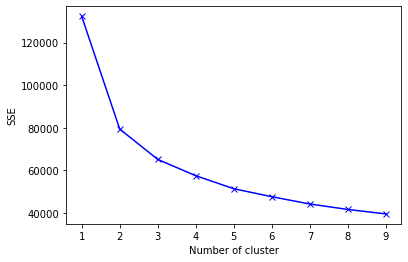

In [31]:
#Empty dictionary to store the SSE for each value of k
sse = {} 

# iterate for a range of Ks and fit the scaled data to the algorithm. Use inertia attribute from the clustering object and 
# store the inertia value for that k 
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(hitting_scaled)
    sse[k] = kmeans.inertia_

#Elbow plot
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

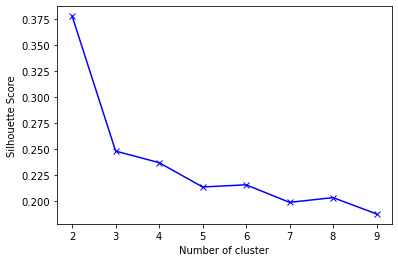

In [32]:
#Empty dictionary to store the Silhouette score for each value of k
sc = {} 

# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k 
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(hitting_scaled)
    labels = kmeans.predict(hitting_scaled)
    sc[k] = silhouette_score(hitting_scaled, labels)

#Elbow plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

In [37]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(hitting_scaled)

#Adding predicted labels to the original data and scaled data 
hitting_scaled['KMeans_Labels'] = kmeans.predict(hitting_scaled)
hitting_data['KMeans_Labels'] = kmeans.predict(hitting_scaled)

In [38]:
hitting_data['KMeans_Labels'].value_counts()

1    3706
2    2122
0    1527
Name: KMeans_Labels, dtype: int64

In [39]:
#Calculating mean and median of the original data for each label
mean = hitting_data.groupby('KMeans_Labels').mean()
median = hitting_data.groupby('KMeans_Labels').median()
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_kmeans.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Age,32.815324,32.733405,34.085297,32.000,32.000,34.000
G,16.357564,48.063681,131.293120,13.000,43.000,135.000
AB,34.285527,135.088775,466.061263,25.000,128.000,471.000
R,2.960707,16.480302,65.227144,2.000,15.000,62.000
H,5.260642,32.784943,124.107917,3.000,30.000,122.000
2B,0.926654,6.444684,24.844486,0.000,6.000,24.000
3B,0.077276,0.631678,2.504241,0.000,0.000,2.000
HR,0.369352,3.876417,17.450047,0.000,3.000,16.000
RBI,2.245580,15.665138,62.714892,1.000,14.000,59.000
SB,0.438769,1.826498,8.046183,0.000,1.000,5.000


### Observation 

This is great! As mentioned several times before, the data consist of pitchers, bench players, and everday starters. This clustering method appears to have placed them into bins based on traits that are correlated with their postion/playing status. 

We can see this by taking a look at the at-bats (AB) feature as well as the games feature (G). Pitchers fall in group_0, everyday players fall in group_1, and bench players fall in group_2. 

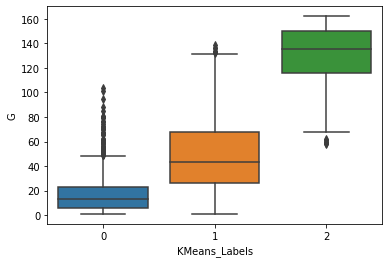

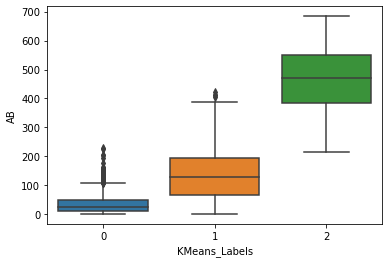

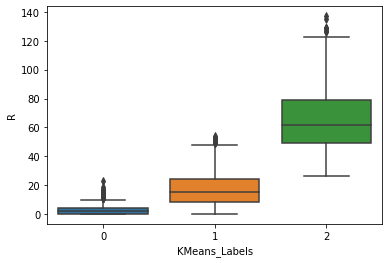

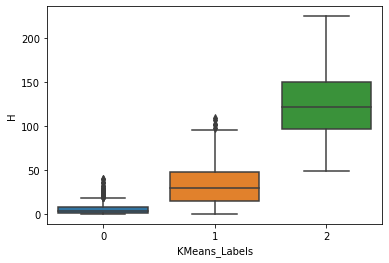

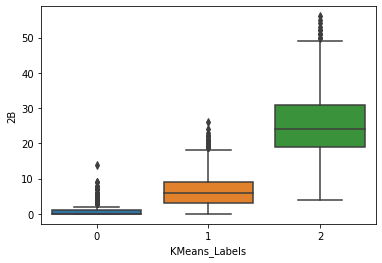

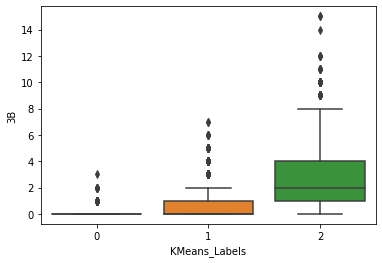

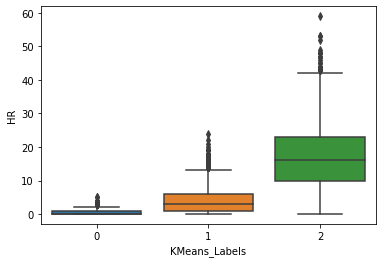

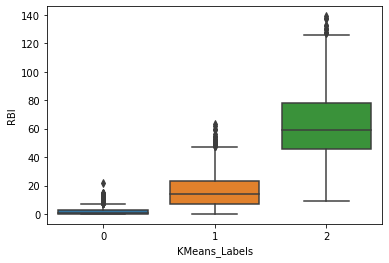

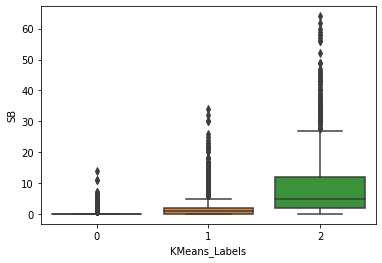

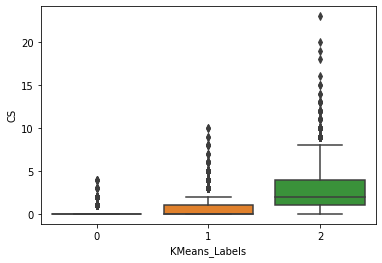

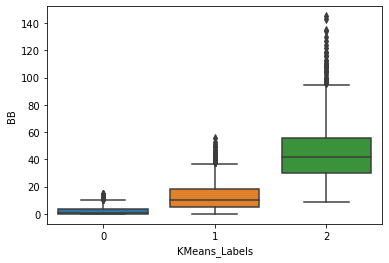

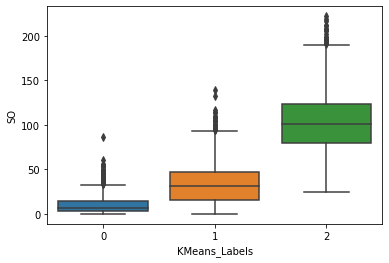

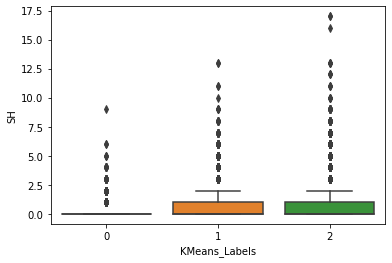

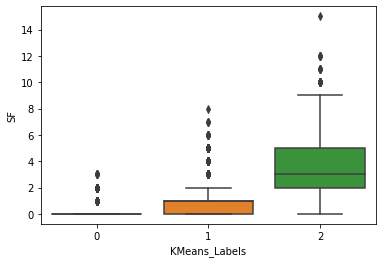

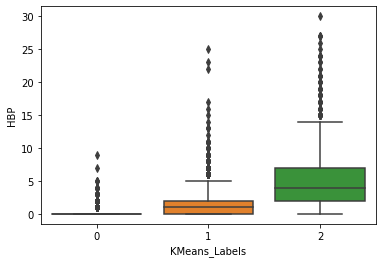

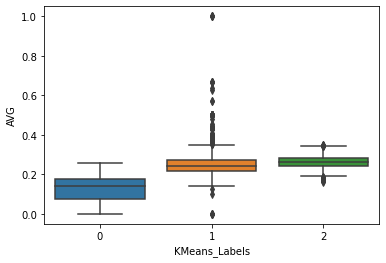

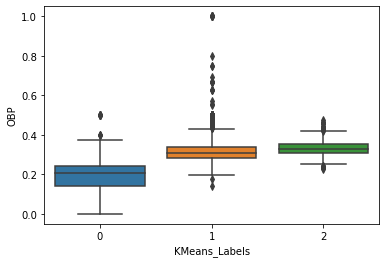

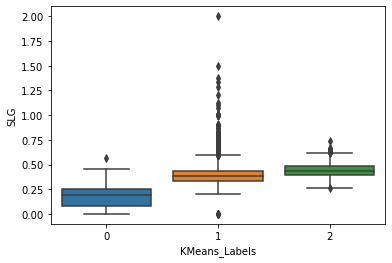

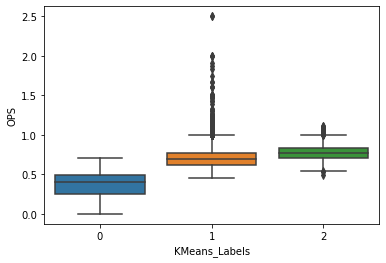

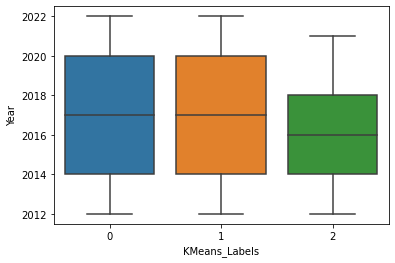

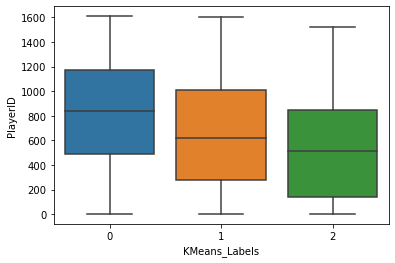

In [40]:
cols_visualise = ['G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'SH', 'SF', 'HBP', 'AVG', 'OBP', 'SLG', 'OPS', 'Year', 'PlayerID']

for col in cols_visualise:
    sns.boxplot(x = 'KMeans_Labels', y = col, data = hitting_data)
    plt.show()

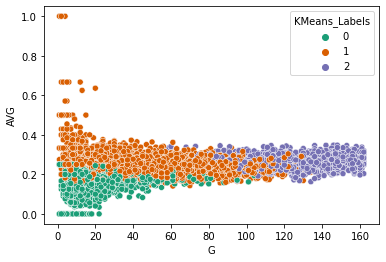

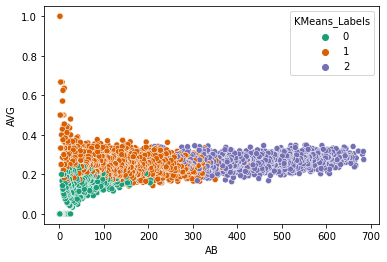

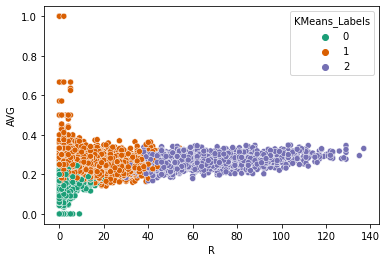

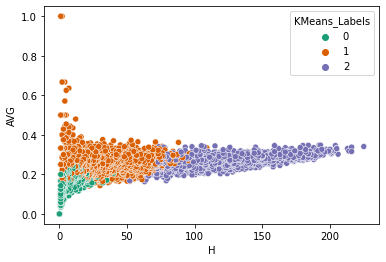

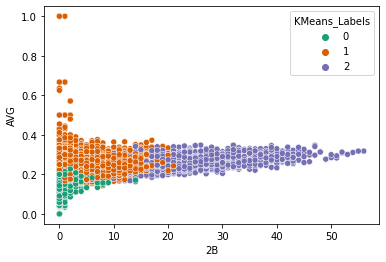

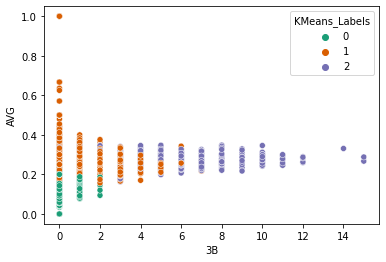

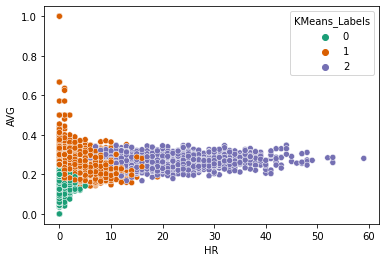

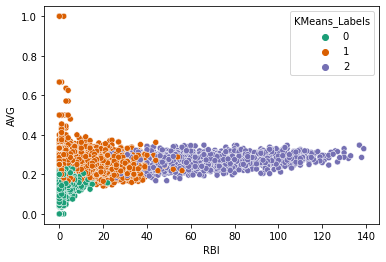

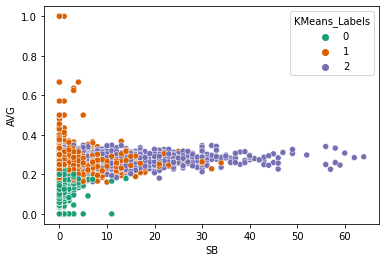

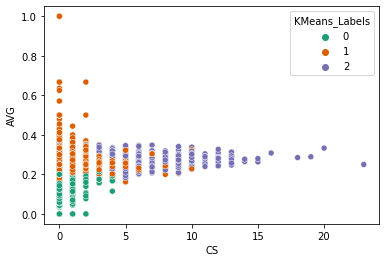

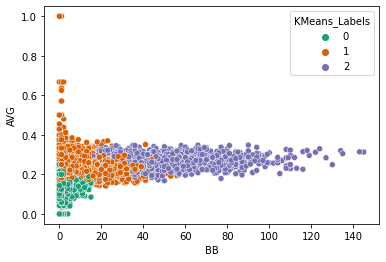

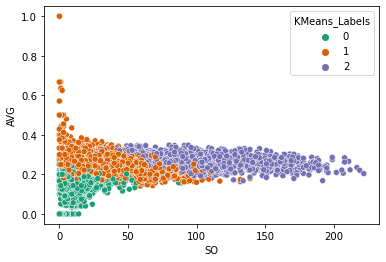

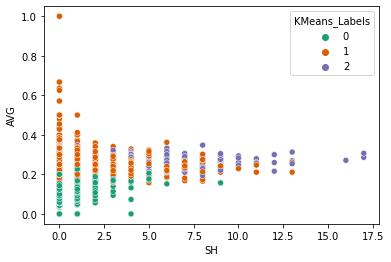

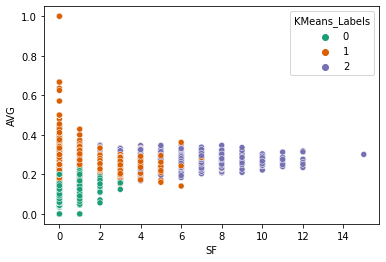

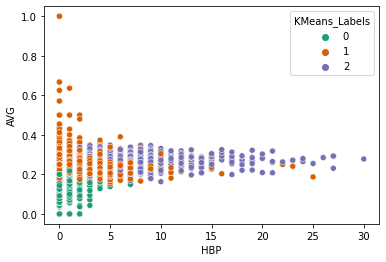

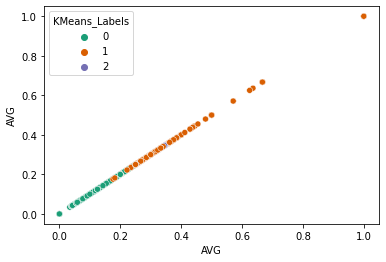

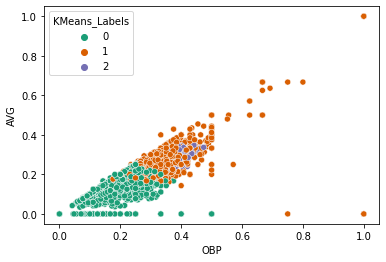

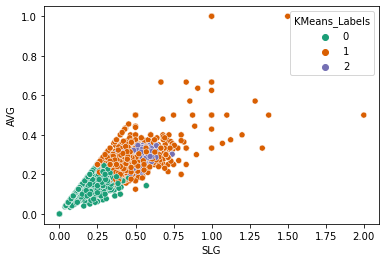

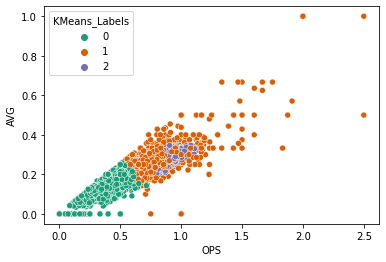

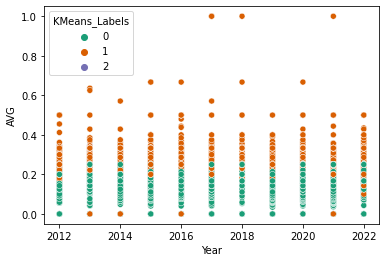

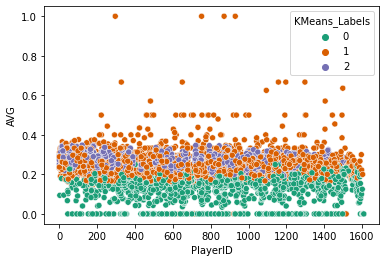

In [41]:
cols_visualise = ['G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'SH', 'SF', 'HBP', 'AVG', 'OBP', 'SLG', 'OPS', 'Year', 'PlayerID']

for col in cols_visualise:
   sns.scatterplot(x = col, y = 'AVG',data = hitting_data ,hue='KMeans_Labels', palette='Dark2')
   plt.show()

# Hierarchical clustering

Since the data set consist of roughly 6,000 observations I have restricted the sample size to only 250. This is to ensure that the kernel doesn't die when running the code.

In [42]:
sample_players = pd.read_csv("Sample_players.csv")

In [43]:
sample_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Player    250 non-null    object 
 1   Team      250 non-null    object 
 2   Pos       250 non-null    object 
 3   Age       250 non-null    int64  
 4   G         250 non-null    int64  
 5   AB        250 non-null    int64  
 6   R         250 non-null    int64  
 7   H         250 non-null    int64  
 8   2B        250 non-null    int64  
 9   3B        250 non-null    int64  
 10  HR        250 non-null    int64  
 11  RBI       250 non-null    int64  
 12  SB        250 non-null    int64  
 13  CS        250 non-null    int64  
 14  BB        250 non-null    int64  
 15  SO        250 non-null    int64  
 16  SH        250 non-null    int64  
 17  SF        250 non-null    int64  
 18  HBP       250 non-null    int64  
 19  AVG       250 non-null    float64
 20  OBP       250 non-null    float6

In [44]:
New_sample_players = sample_players.drop(columns=["Player", "CS", "SH", "SF", "HBP", "Team", "Pos"])

In [45]:
scaler=StandardScaler()
New_sample_scaled=pd.DataFrame(scaler.fit_transform(New_sample_players), columns=New_sample_players.columns)

New_sample_scaled.head()

,Age,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,AVG,OBP,SLG,OPS,Year,PlayerID
0,0.813302,1.466221,2.112813,1.053335,1.980846,1.141124,0.647946,-1.415633,-1.032103,0.048206,-0.237399,0.970328,0.799443,0.279392,-0.524941,-0.269537,0.0,-1.725136
1,-1.387786,1.246067,1.984255,0.407513,1.090178,0.499322,-0.658397,0.703578,0.727163,0.879338,-0.570823,1.490221,-0.138441,-0.841730,-0.076503,-0.373772,0.0,-1.711280
2,-0.562378,1.466221,1.984255,0.891880,1.312845,0.499322,0.647946,0.350376,-0.005864,2.957170,-0.237399,0.658392,0.113187,-0.080213,-0.009238,-0.037012,0.0,-1.697423
3,-0.562378,1.466221,1.941402,0.246058,2.871513,0.820223,-0.658397,0.703578,1.753402,-0.782927,0.096026,-1.005265,1.988953,1.717813,1.055801,1.406247,0.0,-1.683567
4,-0.562378,1.686374,1.812844,1.537701,1.980846,0.178421,-0.658397,2.469587,3.512668,-0.367361,0.262739,0.970328,1.051070,0.913990,1.481817,1.406247,0.0,-1.669710


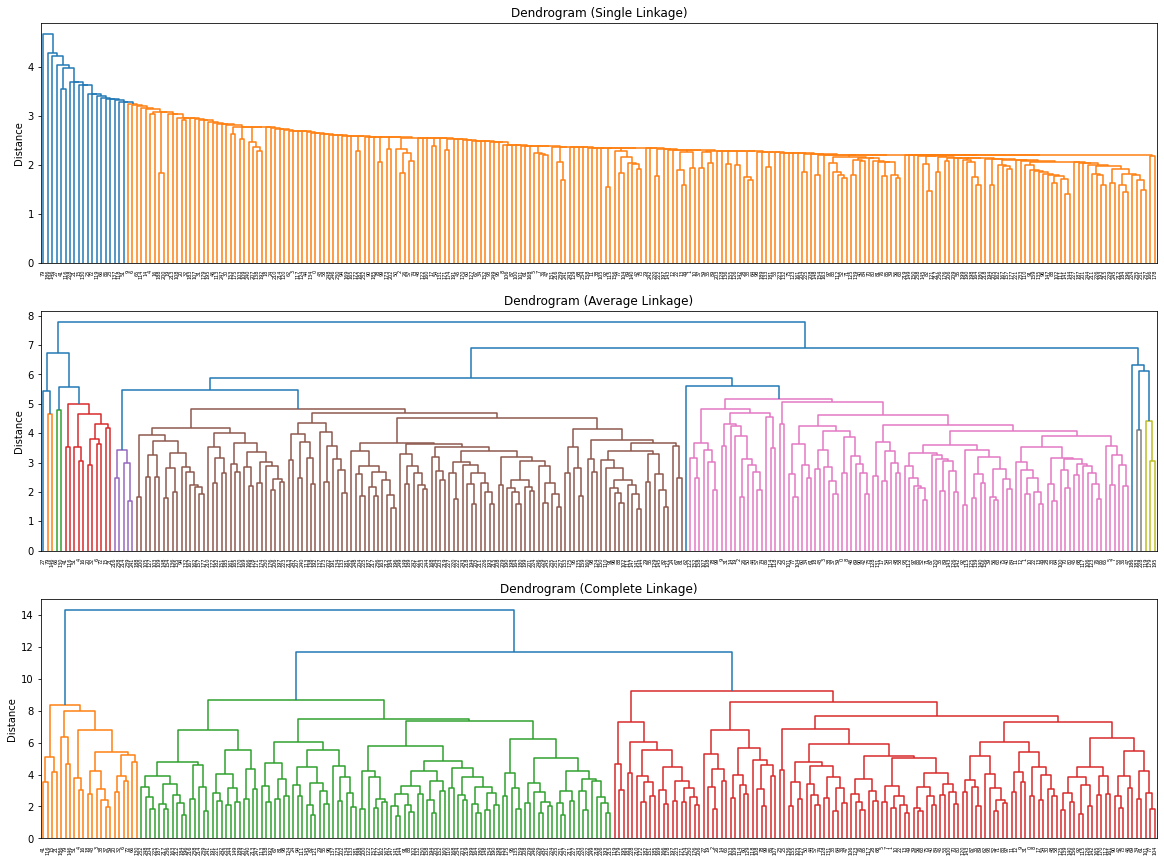

In [46]:
# List of all linkage methods to check
methods = ['single',
           'average', 
           'complete']

#Create a subplot image
fig, axs = plt.subplots(len(methods), 1, figsize=(20, 15))

#Enumerate through the list of all methods above, get linkage and plot dendrogram
for i, method in enumerate(methods):
    Z = linkage(New_sample_scaled, metric='euclidean', method=method)
    dendrogram(Z, ax=axs[i]);
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')
    axs[i].set_ylabel('Distance')

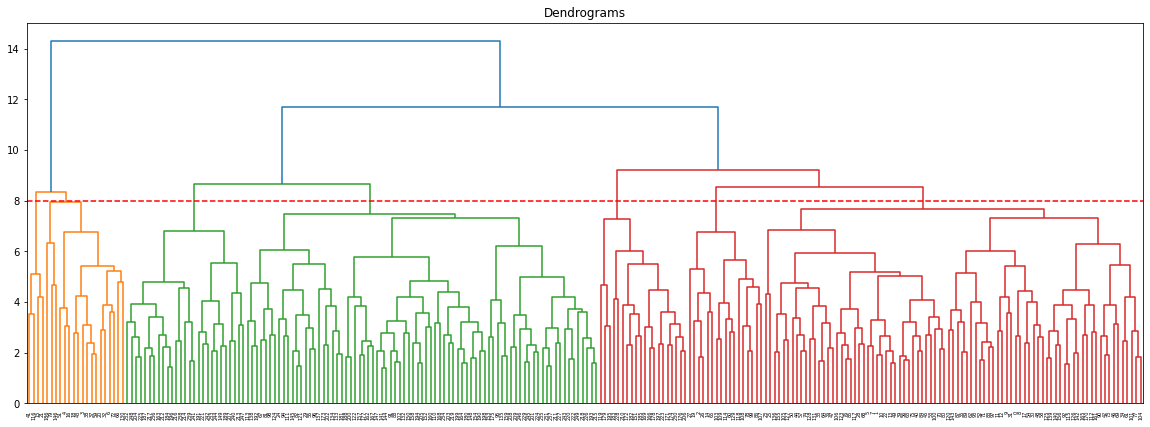

In [47]:
plt.figure(figsize=(20, 7))  
plt.title("Dendrograms")  
dend = dendrogram(linkage(New_sample_scaled, method='complete'))
plt.axhline(y=8, color='r', linestyle='--')

## Observation

Again, we see three bins, similar to what we saw in the k-means clustering previously. However, in order to capture more variation the optimal number of clusters would be 7.

In [48]:
hierarchical = AgglomerativeClustering(n_clusters=7,affinity='euclidean', linkage='complete')
hierarchical.fit(New_sample_scaled)

AgglomerativeClustering(linkage='complete', n_clusters=7)

In [49]:
New_sample_scaled['HCLabels'] = hierarchical.labels_
New_sample_players['HCLabels'] = hierarchical.labels_

In [50]:
New_sample_players.HCLabels.value_counts()

1    85
2    79
4    27
3    20
0    18
5    17
6     4
Name: HCLabels, dtype: int64

In [51]:
New_sample_players[New_sample_players.HCLabels==2]

,Age,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,AVG,OBP,SLG,OPS,Year,PlayerID,HCLabels
24,28,43,155,13,33,7,0,2,16,0,22,24,0.213,0.307,0.297,0.604,2022,25,2
29,31,39,154,13,28,8,0,0,9,3,12,30,0.182,0.243,0.234,0.477,2022,30,2
55,30,40,148,13,25,5,0,4,9,1,7,30,0.169,0.217,0.284,0.501,2022,56,2
67,33,41,145,15,28,7,0,2,16,0,11,51,0.193,0.256,0.283,0.539,2022,68,2
81,29,42,143,15,27,6,0,6,17,0,16,43,0.189,0.273,0.357,0.630,2022,82,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,31,28,88,7,20,1,0,2,10,0,5,17,0.227,0.277,0.307,0.584,2022,238,2
243,27,31,85,9,17,4,1,4,15,1,2,22,0.200,0.225,0.412,0.637,2022,244,2
245,30,26,85,7,20,5,0,2,8,0,10,23,0.235,0.337,0.365,0.702,2022,246,2
246,38,27,84,12,20,1,0,2,10,1,12,19,0.238,0.327,0.321,0.648,2022,247,2


In [52]:
New_sample_players[New_sample_players.HCLabels==3]

,Age,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,AVG,OBP,SLG,OPS,Year,PlayerID,HCLabels
119,24,37,132,25,33,4,1,12,24,0,22,29,0.250,0.355,0.568,0.923,2022,120,3
151,23,33,122,12,34,9,0,1,12,1,10,14,0.279,0.341,0.377,0.718,2022,152,3
166,34,32,116,13,37,8,0,3,20,1,7,28,0.319,0.355,0.466,0.821,2022,167,3
169,32,33,115,13,35,8,0,0,12,0,6,13,0.304,0.365,0.374,0.739,2022,170,3
171,29,33,114,19,28,9,0,7,22,0,13,29,0.246,0.331,0.509,0.840,2022,172,3
172,24,36,114,25,30,4,1,1,12,2,15,24,0.263,0.346,0.342,0.688,2022,173,3
174,25,32,113,23,32,12,0,4,17,0,12,28,0.283,0.341,0.496,0.837,2022,175,3
176,27,29,112,16,30,7,0,2,14,0,11,27,0.268,0.339,0.384,0.723,2022,177,3
178,33,29,111,15,30,8,0,4,17,0,3,27,0.270,0.308,0.450,0.758,2022,179,3
179,32,28,110,20,31,6,0,9,14,2,11,21,0.282,0.352,0.582,0.934,2022,180,3


In [53]:
#Calculating mean and median of the original data for each label
original_features = ['G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'BB', 'SO', 'AVG', 'OBP', 'SLG', 'OPS', 'Year', 'PlayerID']

mean = New_sample_players.groupby('HCLabels').mean()
median = New_sample_players.groupby('HCLabels').median()
df_hierachical = pd.concat([mean, median], axis=0)
df_hierachical.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_3 Mean', 'group_4 Mean', 'group_5 Mean', 'group_6 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median', 'group_3 Median', 'group_4 Median', 'group_5 Median', 'group_6 Median']
df_hierachical[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_3 Mean,group_4 Mean,group_5 Mean,group_6 Mean,group_0 Median,group_1 Median,group_2 Median,group_3 Median,group_4 Median,group_5 Median,group_6 Median
G,38.888889,39.447059,34.392405,31.35000,32.111111,38.941176,39.75000,40.0000,40.000,34.000,31.5000,32.000,39.000,39.5000
AB,149.055556,144.305882,115.544304,108.80000,96.851852,144.470588,150.00000,151.0000,145.000,117.000,109.5000,97.000,142.000,154.0000
R,22.833333,19.611765,11.670886,16.80000,10.888889,20.176471,36.50000,23.0000,19.000,12.000,17.5000,11.000,20.000,35.0000
H,47.111111,35.541176,25.367089,30.30000,18.518519,37.000000,48.50000,47.0000,35.000,26.000,30.0000,20.000,36.000,46.5000
2B,10.166667,7.623529,5.101266,6.50000,3.592593,6.352941,10.50000,9.0000,8.000,5.000,6.0000,3.000,6.000,11.0000
3B,0.777778,0.517647,0.430380,0.30000,0.296296,1.058824,0.50000,0.0000,0.000,0.000,0.0000,0.000,1.000,0.5000
HR,7.000000,5.011765,3.000000,3.65000,1.481481,3.117647,11.75000,7.0000,5.000,3.000,3.0000,1.000,3.000,11.0000
RBI,27.222222,18.858824,12.936709,15.30000,7.555556,16.000000,28.25000,25.5000,19.000,12.000,14.0000,7.000,16.000,26.5000
SB,2.000000,1.670588,1.063291,0.85000,1.962963,7.470588,3.00000,1.0000,1.000,1.000,0.5000,1.000,8.000,2.5000
BB,14.166667,15.682353,9.316456,12.25000,9.037037,12.176471,21.50000,14.0000,15.000,9.000,12.0000,8.000,11.000,21.5000
